# <center>TRABAJO PRACTICO<center>

**Estudiante**: Franco Rojas Yucra

###### Librerias necesarias

In [16]:
library(tidyverse)
library(gganimate)
library(readxl)

## Datos

In [17]:
poblacion  <- read_excel("datos_censo/02 Censo2017-Datos-Piramide-poblacional (Salidas).xlsx")

In [18]:
head(poblacion)

year,edad_quinquenal,sexo,poblacion,porcentaje_total
<dbl>,<chr>,<chr>,<dbl>,<dbl>
2017,0-04,Hombres,1269889,0.04322014
2017,05-09,Hombres,1344405,0.04575626
2017,10-14,Hombres,1324118,0.04506580
2017,15-19,Hombres,1217519,0.04143774
2017,20-24,Hombres,1232042,0.04193203
2017,25-29,Hombres,1159949,0.03947837


Convirtiendo datos a negativos para invertir grafico

In [20]:
poblacion_piramide <- poblacion %>%
    mutate(
    porcentaje_total = ifelse(
      sexo == "Hombres",
      -porcentaje_total, porcentaje_total),
    poblacion = ifelse(sexo == "Hombres", -poblacion, poblacion)
    )

In [22]:
head(poblacion_piramide)

year,edad_quinquenal,sexo,poblacion,porcentaje_total
<dbl>,<chr>,<chr>,<dbl>,<dbl>
2017,0-04,Hombres,-1269889,-0.04322014
2017,05-09,Hombres,-1344405,-0.04575626
2017,10-14,Hombres,-1324118,-0.04506580
2017,15-19,Hombres,-1217519,-0.04143774
2017,20-24,Hombres,-1232042,-0.04193203
2017,25-29,Hombres,-1159949,-0.03947837


### Grafico5: Piramide poblacional

In [25]:
piramide<-subset(poblacion_piramide, year == 2017) %>%
  ggplot(
    aes(x = edad_quinquenal,
        y = porcentaje_total, fill = sexo)
    ) +
  # agregar el argumento color = "white", si gustan
    geom_col(position = "stack", alpha = 0.6) + 
    coord_flip() +
  # colores que me gustan
    scale_fill_manual(values = c("midnightblue", "darkred")) +
  # tema minimalista
    theme_minimal() +
  # leyenda para el fondo
    theme(
      legend.position = "bottom",
      plot.caption = element_text(hjust = 0)) +
  # etiquetas en positivo
    scale_y_continuous(labels = abs) +
    labs(
      y = "Porcentaje de la población total",
      x = "Rangos de edad",
      title = "Pirámide de población de Peru, año 2017", 
      subtitle = "Edad en grupos")

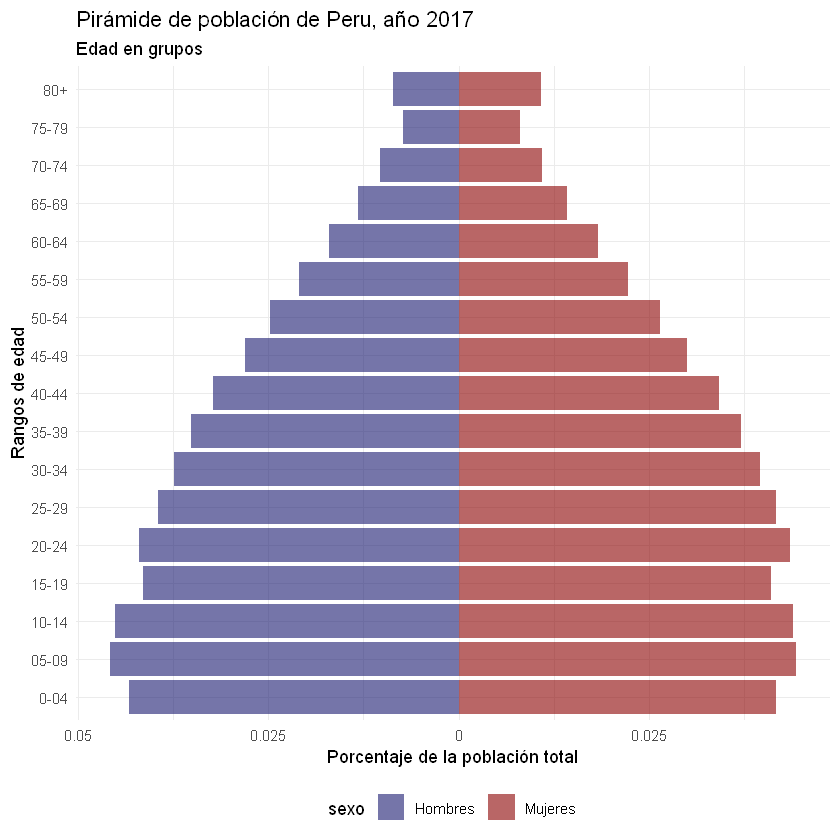

In [26]:
piramide

In [28]:
svg("images_salida/Grafico5.svg")
# Código del gráfico
plot(piramide)
# Cerramos el dispositivo
dev.off()

png 
  2